In [1]:
import matplotlib.pyplot as plt
# import matplotlib
import numpy as np
# import tkinter
# matplotlib.use('TkAgg')
%matplotlib inline

#plumed sum_hills --hills HILLS

In [2]:
with open("hills") as file:
    [file.readline() for x in range(5)]
    data = np.fromfile(file, sep= " ", dtype=float)
data = data.reshape(-1,3).T

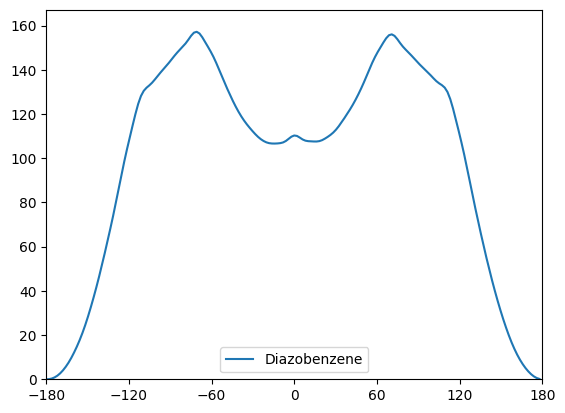

In [7]:
phi, energy, error = data

phi = (phi/np.pi)*180
energy = energy - energy.min()

fig, ax = plt.subplots()
ax.plot(phi, energy, label = "Diazobenzene")
ax.set_xlim(-180, 180)
ax.set_ylim(0, energy.max()+10)
ax.set_xticks([x for x in range(-180, 181, 60)])
ax.legend();